In [41]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Homework 3

Due 12/10 10am. No submissions will be accepted after 12/13 9am.

In this  homework you will create CNN models of the CIFAR-10 and CIFAR-100 datasets which are available as PyTorch and Tensorflow datasets. Info about these datasets can be found at https://www.cs.toronto.edu/~kriz/cifar.html

All parts must be able to run on Google colab using GPUs.

**All work must be your own work.** If you copy something from the internet, include the link.

Make sure all the output is shown.

Name your submission your_rcsid_HW3.ipynb

There are three parts to the assignment:

1) Tensorflow Model (40 pts)  
2) Pytorch Model (40 pts)  
3) Pretrained Mode (20 pts)  

Points for each part are in () after the part number.

### 1. Tensorflow Model

#### 1.1(1) Tensorflow imports

Display Version

In [43]:
# Your Code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model,save_model

tf.__version__

'2.7.0'

#### 1.2(2) Load the CIFAR10 data into Training and Test sets. Display the shapes.

In [44]:
# Your Code Here
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

#### 1.3(2) Data Preprocessing
Reshape each image to a 4-d array, convert to floating point and scale.

Display 5 training values and 5 test values

In [45]:
# Your Code Here
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train[16:22], X_test[16:22] 

(array([[[[0.92156863, 0.9254902 , 0.93333334],
          [0.92156863, 0.9254902 , 0.93333334],
          [0.92941177, 0.93333334, 0.9411765 ],
          ...,
          [0.9137255 , 0.91764706, 0.9254902 ],
          [0.8901961 , 0.9019608 , 0.9137255 ],
          [0.8745098 , 0.89411765, 0.9098039 ]],
 
         [[0.90588236, 0.9098039 , 0.91764706],
          [0.9098039 , 0.9137255 , 0.92156863],
          [0.91764706, 0.92156863, 0.92941177],
          ...,
          [0.90588236, 0.9098039 , 0.91764706],
          [0.88235295, 0.89411765, 0.9098039 ],
          [0.8666667 , 0.88235295, 0.9137255 ]],
 
         [[0.90588236, 0.9098039 , 0.91764706],
          [0.9137255 , 0.91764706, 0.9254902 ],
          [0.92941177, 0.93333334, 0.9411765 ],
          ...,
          [0.9098039 , 0.9137255 , 0.92156863],
          [0.88235295, 0.89411765, 0.9098039 ],
          [0.8666667 , 0.8862745 , 0.9137255 ]],
 
         ...,
 
         [[0.49019608, 0.4862745 , 0.47843137],
          [0.49411

#### 1.4(2) Encode the dependent variable. 

Display the shapes.

In [46]:
# Your Code Here
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_train_one_hot.shape, y_test_one_hot.shape

((50000, 10), (10000, 10))

#### 1.5(2) Split training data into training data and validation data. 

Use 20% of the data for validation. Display the shapes.


In [47]:
# Your Code Here
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

#### 1.6 (15) Specify model structure

Create a Tensorflow model. Experiment with different layer structures to optimize classification performance.

Keep your best one here. Summarize your results in question 1.13.

In [48]:
# Your Code Here

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),
                     padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))


#### 1.7(2) Output a model summary.

In [49]:
# Your Code Here
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

#### 1.8(2) Compile Model with Adam optimizer

Use appropriate loss function and use 'accuracy' as metric.

In [50]:
# Your Code Here

model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#### 1.9(2) Train the model with training and validation data.

Experiment with different batch sizes. Summarize your results in 1.13.

In [51]:
# Your Code Here
batch_size = 128 #Minibatch size
epochs = 10
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
                        validation_data=(valid_X, valid_label))

Epoch 1/10
313/313 [==============================] - 6s 18ms/step - loss: 1.5260 - accuracy: 0.4507 - val_loss: 1.2212 - val_accuracy: 0.5615
Epoch 2/10
313/313 [==============================] - 5s 17ms/step - loss: 1.1062 - accuracy: 0.6108 - val_loss: 1.0177 - val_accuracy: 0.6499
Epoch 3/10
313/313 [==============================] - 5s 17ms/step - loss: 0.9240 - accuracy: 0.6800 - val_loss: 0.9054 - val_accuracy: 0.6886
Epoch 4/10
313/313 [==============================] - 5s 17ms/step - loss: 0.8017 - accuracy: 0.7214 - val_loss: 0.8990 - val_accuracy: 0.6878
Epoch 5/10
313/313 [==============================] - 5s 17ms/step - loss: 0.7086 - accuracy: 0.7537 - val_loss: 0.8203 - val_accuracy: 0.7221
Epoch 6/10
313/313 [==============================] - 5s 17ms/step - loss: 0.6256 - accuracy: 0.7827 - val_loss: 0.8035 - val_accuracy: 0.7294
Epoch 7/10
313/313 [==============================] - 5s 17ms/step - loss: 0.5439 - accuracy: 0.8118 - val_loss: 0.8269 - val_accuracy: 0.7240

#### 1.10(1) Plot the training and validation loss

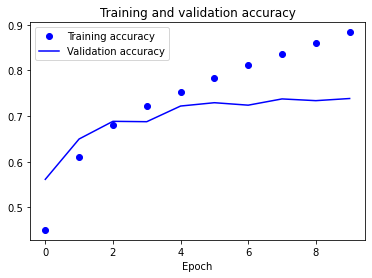

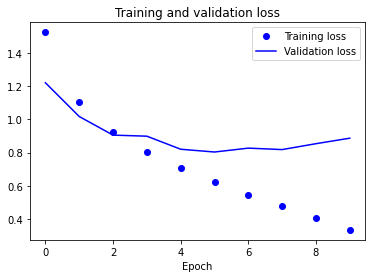

In [52]:
# Your Code Here

accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epoch")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend();

#### 1.11(2) Evaluate model on the test set

Display test loss and accuracy

In [53]:
# Your Code Here
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.9101974368095398
Test accuracy: 0.7379999756813049


#### 1.12(2) Predict the classes of the test data

Display Confusion Matrix and accuracy.

In [54]:
# Your Code Here

predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
cm = confusion_matrix(predicted_classes,y_test)
print(cm)

print(f'Accuracy: {np.trace(cm)/np.sum(cm)}')

[[748  32 134 150 106 119  67  71  48  57]
 [ 14 830   8   8   2   4  10   5  14  57]
 [ 43   3 596  54  46  54  37  19   7   8]
 [ 14  10  52 529  32 149  51  28   8  13]
 [ 20   1  79  57 703  38  28  57   6   6]
 [  3   3  27  99  16 553  10  23   3   9]
 [  6   3  37  40  25  19 781   8   2   0]
 [  9   1  36  32  53  43   7 768   2   8]
 [ 98  34  18  16  14  10   6   8 891  28]
 [ 45  83  13  15   3  11   3  13  19 814]]
Accuracy: 0.7213


#### 1.13(5) Your summary of the experiments you conducted

Batch size for 64, speed is slow, but has high accuracy.

When I do experiment with other batch size, speed becomes faster but accuracy becomes lower.

### 2. PyTorch Model

In [55]:
def conv_image_size(layers,size_in,padding=0,kernel=3,stride=2,dilation=1):
    for _ in range(layers):
        size_in = np.floor(((size_in+2*padding - dilation*(kernel-1)-1)/stride)+1)
    return int(size_in)


####  Install pytorch-model-summary if not installed. It is not installed in colab.

In [56]:
!pip install pytorch-model-summary


#### 2.1(1) PyTorch imports

Display PyTorch Version

In [57]:
# Your Code Here

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from pytorch_model_summary import summary
torch.__version__


'1.10.0+cu111'

#### 2.2(1) Set PyTorch device

Display the device

In [58]:
# Your Code Here
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 2.3 (2) Load the CIFAR100 Training and Test datasets as tensors

Display the data shape

In [59]:
# Your Code Here
import torchvision
import torchvision.transforms as transforms


trainset = torchvision.datasets.CIFAR100(root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

testset = torchvision.datasets.CIFAR100(root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

trainset.data.shape, testset.data.shape

Files already downloaded and verified
Files already downloaded and verified


((50000, 32, 32, 3), (10000, 32, 32, 3))

#### 2.4 (10) Define and instantiate the model

Create a PyTorch model. Experiment with different layer structures to optimize classification performance.

Keep your best one here. Summarize your results in question 2.11.


In [60]:
# Your Code Here
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv_layers = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
      nn.ReLU()
    )
    
    self.flatten = nn.Flatten()
    
    self.dense_layers = nn.Sequential(
      nn.Dropout(0.2),
      nn.Linear(128 * inp_sz * inp_sz, 512),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(512, K)
    )
   
  
  def forward(self, X):
    z = self.conv_layers(X)
    z = self.flatten(z)
    out = self.dense_layers(z) # Softmax done in CrossEntopy Loss
    return out
inp_sz = conv_image_size(3,32)
model = CNN(100).to(device)

#### 2.5(2) Print a summary

In [61]:
# Your Code Here
!pip install pytorch-model-summary
from pytorch_model_summary import summary
print(summary(model,torch.zeros((1,3,32,32)).to(device),show_input=False,show_hierarchical=False))


-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Conv2d-1     [1, 32, 15, 15]             896             896
            ReLU-2     [1, 32, 15, 15]               0               0
          Conv2d-3       [1, 64, 7, 7]          18,496          18,496
            ReLU-4       [1, 64, 7, 7]               0               0
          Conv2d-5      [1, 128, 3, 3]          73,856          73,856
            ReLU-6      [1, 128, 3, 3]               0               0
         Flatten-7           [1, 1152]               0               0
         Dropout-8           [1, 1152]               0               0
          Linear-9            [1, 512]         590,336         590,336
           ReLU-10            [1, 512]               0               0
        Dropout-11            [1, 512]               0               0
         Linear-12            [1, 100]          51,300          51,300
Total

#### 2.6(1) Define Loss and optimizer

In [62]:
# Your Code Here
criterion = nn.CrossEntropyLoss() # Applies the softmax function
optimizer = torch.optim.Adam(model.parameters())


#### 2.7 (2) Create Data loaders

The data loader automatically generates batches in the training loop and takes care of shuffling the data

In [63]:
# Your Code Here

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


### 2.8(5) Train the Model 

Display Epoch, train loss test loss and time of execution of epoch.

In [64]:
# Your Code Here

def mini_batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs,device):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train() # Set training mode
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to device
      inputs, targets = inputs.to(device), targets.to(device)
     
      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    
    train_loss = np.mean(train_loss) 
    
    test_loss = []
    model.train(False) # Set test model aka model.eval()
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

train_losses, test_losses = mini_batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=50,device=device)


Epoch 1/50, Train Loss: 3.9349,       Test Loss: 3.6182, Duration: 0:00:15.208986
Epoch 2/50, Train Loss: 3.4112,       Test Loss: 3.2375, Duration: 0:00:14.853997
Epoch 3/50, Train Loss: 3.1764,       Test Loss: 3.0515, Duration: 0:00:15.043275
Epoch 4/50, Train Loss: 3.0158,       Test Loss: 2.9660, Duration: 0:00:14.962457
Epoch 5/50, Train Loss: 2.8861,       Test Loss: 2.8772, Duration: 0:00:15.044784
Epoch 6/50, Train Loss: 2.7734,       Test Loss: 2.7818, Duration: 0:00:15.025055
Epoch 7/50, Train Loss: 2.6756,       Test Loss: 2.7694, Duration: 0:00:15.054412
Epoch 8/50, Train Loss: 2.5962,       Test Loss: 2.7317, Duration: 0:00:15.036717
Epoch 9/50, Train Loss: 2.5139,       Test Loss: 2.6897, Duration: 0:00:15.002963
Epoch 10/50, Train Loss: 2.4228,       Test Loss: 2.6914, Duration: 0:00:15.011494
Epoch 11/50, Train Loss: 2.3645,       Test Loss: 2.6489, Duration: 0:00:14.953140
Epoch 12/50, Train Loss: 2.3049,       Test Loss: 2.6448, Duration: 0:00:14.920244
Epoch 13/50, 

#### 2.9 (1) Plot the train loss and test loss per iteration

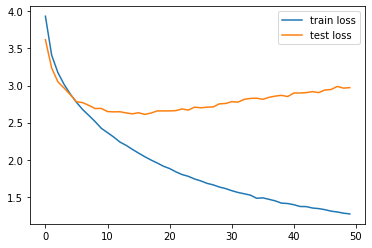

In [65]:
# Your Code Here
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


#### 2.10(10) Predict the Test Data 

Display Confusion Matrix and accuracy.

In [66]:
# Your Code Here
x_test = testset.data
y_test = testset.targets

pred_test = np.array([])
n_correct = 0.
n_total = 0.

model.eval() # Sets training flag to false

for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update counts and pred_test
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))

test_acc = n_correct / n_total
print(f"Test accuracy: {test_acc:.4f}")
cm = confusion_matrix(y_test, pred_test)
print(cm)

print(f'Accuracy = {np.trace(cm)/np.sum(cm)}')


Test accuracy: 0.3529
[[67  1  0 ...  0  1  0]
 [ 2 54  1 ...  0  0  0]
 [ 2  1 28 ...  0  6  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 2  0  4 ...  0 10  1]
 [ 0  0  1 ...  0  0 32]]
Accuracy = 0.3529


#### 2.11(5) Your summary of the experiments you conducted

The best epoch would be some number between 0 and 10, if we trained a lot, even though we have higher trained accuracy but we overfit. In this way, our test loss becomes very large.

### 3.0 Pretrained

#### 3.1 (1) Load a PyTorch pretrained ResNet50 model

In [67]:
# Your Code Here

resnet = models.resnet50(pretrained=True)

#### 3.2 (4) Print a summary

In [68]:
# Your Code Here

print(summary(resnet,torch.zeros((1,3,32,32)),show_input=True))

----------------------------------------------------------------------------
           Layer (type)         Input Shape         Param #     Tr. Param #
               Conv2d-1      [1, 3, 32, 32]           9,408           9,408
          BatchNorm2d-2     [1, 64, 16, 16]             128             128
                 ReLU-3     [1, 64, 16, 16]               0               0
            MaxPool2d-4     [1, 64, 16, 16]               0               0
           Bottleneck-5       [1, 64, 8, 8]          75,008          75,008
           Bottleneck-6      [1, 256, 8, 8]          70,400          70,400
           Bottleneck-7      [1, 256, 8, 8]          70,400          70,400
           Bottleneck-8      [1, 256, 8, 8]         379,392         379,392
           Bottleneck-9      [1, 512, 4, 4]         280,064         280,064
          Bottleneck-10      [1, 512, 4, 4]         280,064         280,064
          Bottleneck-11      [1, 512, 4, 4]         280,064         280,064
          B

#### 3.3 (5) Modify model for CIFAR10 dataset. 
Set requires_grad attribute of all the parameters to False

Replace last layer with a Linear Layer with the correct number of inputs and outputs.

Hint: Use summary above and see https://discuss.pytorch.org/t/how-to-modify-the-final-fc-layer-based-on-the-torch-model/766

In [69]:
# Your Code Here
for param in model.parameters():
    param.requires_grad = False
resnet.fc = nn.Linear(2048, 10)



#### 3.4 (2) Send model to device and print summary

In [70]:
# Your Code Here
resnet.to(device)
print(summary(resnet,torch.zeros((1,3,32,32)).to(device),show_input=False,show_hierarchical=False))

----------------------------------------------------------------------------
           Layer (type)        Output Shape         Param #     Tr. Param #
               Conv2d-1     [1, 64, 16, 16]           9,408           9,408
          BatchNorm2d-2     [1, 64, 16, 16]             128             128
                 ReLU-3     [1, 64, 16, 16]               0               0
            MaxPool2d-4       [1, 64, 8, 8]               0               0
           Bottleneck-5      [1, 256, 8, 8]          75,008          75,008
           Bottleneck-6      [1, 256, 8, 8]          70,400          70,400
           Bottleneck-7      [1, 256, 8, 8]          70,400          70,400
           Bottleneck-8      [1, 512, 4, 4]         379,392         379,392
           Bottleneck-9      [1, 512, 4, 4]         280,064         280,064
          Bottleneck-10      [1, 512, 4, 4]         280,064         280,064
          Bottleneck-11      [1, 512, 4, 4]         280,064         280,064
          B

#### 3.5 (4) Load the CIFAR10 training dataset and retrain the model.

Print the epoch, training loss and time of execution of each epoch.

In [71]:
# Your Code Here
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
model = resnet
criterion = nn.CrossEntropyLoss() # Applies the softmax function
optimizer = torch.optim.Adam(model.parameters())
train_losses, test_losses = mini_batch_gd(
    resnet, criterion, optimizer, train_loader, test_loader, epochs=15,device=device)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15, Train Loss: 0.8912,       Test Loss: 0.7381, Duration: 0:01:19.873846
Epoch 2/15, Train Loss: 0.5749,       Test Loss: 0.5977, Duration: 0:01:19.872476
Epoch 3/15, Train Loss: 0.4575,       Test Loss: 0.7397, Duration: 0:01:19.673868
Epoch 4/15, Train Loss: 0.3536,       Test Loss: 0.7168, Duration: 0:01:20.009479
Epoch 5/15, Train Loss: 0.2967,       Test Loss: 0.7794, Duration: 0:01:19.644540
Epoch 6/15, Train Loss: 0.2386,       Test Loss: 0.6304, Duration: 0:01:19.958188
Epoch 7/15, Train Loss: 0.1977,       Test Loss: 0.6408, Duration: 0:01:19.620124
Epoch 8/15, Train Loss: 0.2231,       Test Loss: 0.7001, Duration: 0:01:19.898999
Epoch 9/15, Train Loss: 0.1525,       Test Loss: 0.6847, Duration: 0:01:20.037073
Epoch 10/15, Train Loss: 0.1342,       Test Loss: 0.7180, Duration: 0:01:20.039466
Epoch 11/15, Train Loss: 0.0985,       Test Loss: 0.8053, Duration: 0:01:19.584383
Epoch 12/15, Train L

#### 3.6 (1) Plot the Training Loss

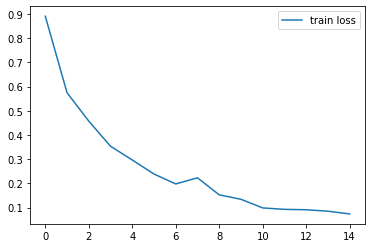

In [72]:
# Your Code Here
model = resnet

# Your Code Here
plt.plot(train_losses, label='train loss')
plt.legend()
plt.show()


#### 3.7 (3) Load the test CIFAR10 dataset and predict the Test dataset.

Display the Confusion Matrix and accuracy

In [73]:
# Your Code Here

# Your Code Here
x_test = test_dataset.data
y_test = test_dataset.targets

pred_test = np.array([])

model.eval()
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update pred_test
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, pred_test)
print(cm)

print(f'Accuracy = {np.trace(cm)/np.sum(cm)}')




[[874  18  41   4  10   5   6   1  26  15]
 [ 12 912   5   6   3   3   4   3  10  42]
 [ 38   4 831  17  53  15  27   9   2   4]
 [ 25   7 114 614  63  87  59  21   7   3]
 [ 11   5  60  18 833  14  37  17   4   1]
 [ 12   1  80 127  47 653  38  37   3   2]
 [  5   3  63  20  31   7 864   5   1   1]
 [ 11   4  37  14  52  29   7 836   3   7]
 [ 45  35  18   4   8   3   5   0 861  21]
 [ 30  67  11  11   6   2   6   8  21 838]]
Accuracy = 0.8116
